In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Activity 13: Hi-Ho! Cherry-O!

In this activity, we'll be building a simulation of the classic children's game, Hi-Ho! Cherry-O!

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ffarm3.staticflickr.com%2F2342%2F2352999023_28c32dc926_o_d.jpg&f=1&nofb=1" width=500>

If you're not familiar with this game, here's a video that explains the rules:

<iframe width="560" height="315" src="https://www.youtube.com/embed/81rf8hLjnRE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

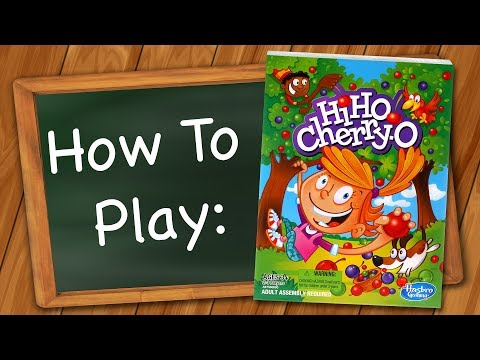

In [2]:
# Run this cell to load the video
from IPython.display import YouTubeVideo
YouTubeVideo('81rf8hLjnRE', width=500)

This kind of game is perfect for a simple simulation because it has the following characteristics:
* Players do not interact with each other.
* Each turn is exactly like the previous turn. The result of one turn does not impact the way the next turn is played.
* Each turn is determined by a random event (no strategy or skill required).
* There is a clear condition for the game to end.

Coincidentally these are probably the same reasons that this game is great for children between the ages of 2 and 5.

In this activity we will ONLY simulate the game from the point of view of one player, you!

## The Spinner

Let's start by making an array that contains the possible outcomes for the spinner:
* One
* Two
* Three
* Four
* Bird
* Dog
* Bucket

**Create an array that contains these outcomes as `string` type objects.** Name that array `spinner`

In [3]:
spinner = make_array('One', 'Two', 'Three', 'Four', 'Bird', 'Dog', 'Bucket')
spinner 

array(['One', 'Two', 'Three', 'Four', 'Bird', 'Dog', 'Bucket'],
      dtype='<U6')

After defining the array, use the `np.random.choice` function in the cell below to "spin the wheel" a few times and make sure you know how to randomly obtain an outcome from the spinner

In [4]:
np.random.choice(spinner)

'Bird'

## One Spin

The function below, `one_spin`, will take in the current number of cherries in the bucket, spins the spinner using `np.random.choice`, and then computes how many cherries are in the bucket after the spin. The new number of cherries in the bucket is returned from this function as an integer.

Examine the complicated series of `if` and `elif` statements to make sure you understand their logic. In particular, check out the section that checks to make sure spinning Dog or Bird doesn't cause your cherry count to become negative.

In [5]:
def one_spin( current_count ):
    # Spin the spinner to create a string of the outcome
    spin = np.random.choice(spinner)
    
    # Use if / elif statements to determine what that 
    # outcome means for the new number of cherries in
    # the bucket
    
    if spin == 'One':
        new_count = current_count + 1
    elif spin == 'Two':
        new_count = current_count + 2
    elif spin == 'Three':
        new_count = current_count + 3
    elif spin == 'Four':
        new_count = current_count + 4
    elif (spin == 'Bird' or spin == 'Dog'):
        new_count = current_count - 2      
        # If subtracting 2 from the Bird or Dog causes new_count 
        # to be negative then the new_count should really be 0 
        # since you can't have negative cherries in your bucket
        if new_count < 0:
            new_count = 0      
    elif spin == 'Bucket':
        new_count = 0
   
    return new_count

Try this function out by running the cell below a few times. You should (hopefully) see all the possible outcomes appear after a few spins. Since the input to the function is 3, you could possibly see results of 0 (bucket), 1 (bird or dog), 4 (one), 5 (two), 6 (three), or 7 (four). You should NOT see outputs of 2 or 3, since there are no ways to reduce the number of cherries in the bucket by 1 or have them stay the same.

In [6]:
one_spin(3)

4

## One Game

Now that we have a way to determine the number of cherries that will be in our bucket after a spin of the spinner, let's turn that into a function that simulates a single game. We'll call that function `one_game`. Here are some ideas to get this function started.

### `bucket`
We're going to use the number of cherries in the bucket to determine if the game is over. At the start of the game, there will be 0 cherries in the bucket. We'll know the game is over when the number of cherries in the bucket is 10 or more. When you call the function, it will create a variable named `bucket` that starts at 0.

### `turns`
In this simulation, **the statistic we're going to collect is the number of turns it takes to complete a game**. When you call the function `one_game` it will create a variable named `turns` that starts at 0.

### `max_turns`
Imagine a situation where you keep spinning bucket, Dog, and/or Bird very frequently. You could end up with a game that went out for a very long time. In fact, there's nothing that would stop you from playing a game that never ended! While is outcome is essentially impossible it's not *that* uncommon to have a game that goes on for a few hundred spins. To help make sure we don't end up with a game that goes on too long, we'll set `max_turns` to a value low enough so things don't go on too long. 200 should be low enough to not impact our analysis later on.

In [7]:
def one_game():
    bucket = 0
    turns = 0
    max_turns = 200

    # You write a for loop below that runs until bucket >= 10
    # or it runs for max_turns number of times. Remember, a 
    # return statement will force a loop to complete, so if you 
    # determine bucket >= 10 and then return turns the loop will stop
    
    for turn in np.arange(max_turns):
        # update the number of cherries in the bucket using one_spin
        bucket = one_spin(bucket)
        
        # update the number of turns that have been taken
        turns = turns + 1
        
        # check to see if the game is over, if so return the number of spins
        # this will cause the loop to finish, even if it didn't make it through
        # the full array of values we're using to play max_turns
        if bucket >= 10:
            return turns

    # if your code makes it here, that means it played the max number of turns
    # and the loop finished. just return the number of
    return turns

If you wrote the function correctly, running the cell below will display the number of turns needed to complete a single game. Run it a few times to get a feel for a typical result.

In [8]:
one_game()

26

## Analysis of Games

Now that we have a way to simulate a single game, let's play 10,000 games and analyze the results. In the cell below:

* create an empty array called `outcomes`
* create a variable `num_of_games` that's set equal to 10,000
* create a loop that will run `num_of_games` times
  * each time the loop runs it should play a game using `one_game` and append the result to the array you've named `outcomes`

In [9]:
num_of_games = 10000
outcomes = make_array()

for game in np.arange(num_of_games):
    outcomes = np.append(outcomes, one_game())

What are some results you infer about this game from the array of statistics we created about the length of the games? This is a good chance for you to practice your `numpy` commands.

To get you started, can you compute:
* What was the longest game that was simulated?
* What was the shortest game that was simulated?
* What was the average number of turns per simulated game?
* What proportion of games were completed in 10 turns or less (**Hint:** Use a comparison operator (e.g. `==`, `<=`, ...) and `np.sum` to first count how many games meet this condition, then convert to a proportion.
* What proportion of games took 50 or more turns to complete?

See if there's anything else you can determine using the array of `outcomes`. If you find anything of interest, share on the course discussion board!

**NOTE:** Since these games are played using random events, your results may vary from your classmates or the solutions!

In [10]:
# Longest game
np.max(outcomes)

108.0

In [11]:
# Longest game
np.min(outcomes)

3.0

In [12]:
# Average game
np.average(outcomes)

15.7242

In [13]:
# Proportion of games finished in 10 turns or less
np.sum( outcomes <= 10 ) / len(outcomes)

0.4367

In [14]:
# Proportion of games that took 50 or more turns
np.sum( outcomes >= 50 ) / len(outcomes)

0.0235

### Visualizations

To create some visualizations, our array needs to be put into a table. In the cell below, create a table named `outcomes_table` that has a single column labeled `'Turns'`.

In [15]:
outcomes_table = Table().with_column('Turns', outcomes)
outcomes_table

Turns
16
10
10
14
21
9
20
6
13
4


Create a histogram to visualize the distribution of scores. Use the suggested bins that are provided in the code block below. You can use them in your `.hist()` call by including `bins = suggested_bins` after you've specified the column name. The suggested bins will automatically scale from 0 to the largest score using a bin width of 2.

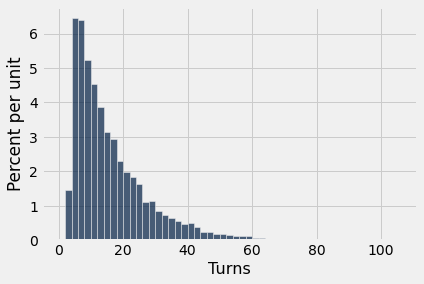

In [16]:
suggested_bins = np.arange(0, np.max(outcomes), 2)
outcomes_table.hist('Turns', bins = suggested_bins)

Do you notice any other patterns in the distribution?